# Credit card fraud detection using Naive Bayes

### Hanah Chang

## 1. Introduction 

In this project, we are going to detect fraudulent credit card transactions using Naive Bayes algorithm. The dataset is from (https://www.kaggle.com/mlg-ulb/creditcardfraud/home). It contains 284,807 credit card transactions made in September 2013 by European cardholders. It includes 30 variables and 28 of which are principal components obtained from PCA. Our class is binary variable, 1 in case of fraud 0 otherwise. The author says the data contains only numerical input variables which are the result of a Principal Component Analysis(PCA) transformation due to confidentiality issues.

PCA is a mathmetical procedure where it transforms variables into smaller number of uncorrelated variables(PC), by which it reduces dimensions of the data without losing any information. To put it simply,  we can assume the principal components from the dataset (v1, v2, v3…) are new variables which are consist of important fraction of all original variables.

Although we may not know what are the original features as well as the relationship between each attribute and our class, we can still use this data to achieve our goal, which is predict frauds accurately. 


## 2. Data & Libaray


From min, max and std values, we know that variable 'time' and 'amount' need normalization / scaling.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## 3. Explanatory Analysis 

There are 492 fraud cases out of total 284,807 transactions. Which is only 0.173% of all transactions. The dataset is highly skewed, and it will be interesting too see if Naive Bayes perform well with this type of data.

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
print( 'fraud transactions % =', (len(df[df['Class']==1]) / len(df[df['Class']==0]) )*100,"%")

fraud transactions % = 0.17304750013189596 %


We are skipping correlation analysis because by definition, PCA solves multicollinearity among predictor variables. Next, we are going to use Kernel Density Estimation (KDE) plot. KDE is a non-parametric way to estimate the probability density function of a random variable. To put it simply, it allows us to estimate what’s the share of data that falls into a particular interval. 

By looking at below KDE plots, we know that the distribution of Fraud / Legit datapoints for 12 variables - 'Time','V8','V13','V15','V20','V22','V23','V24','V25','V26','V27', 'V28' - are largely overlaps. It means that it might be difficult to classify Fraud and Legit based on these variables. 

In [9]:
colnames = df.drop('Class',axis=1).columns.values
fraud = df[df.Class ==0]
legit = df[df.Class ==1]

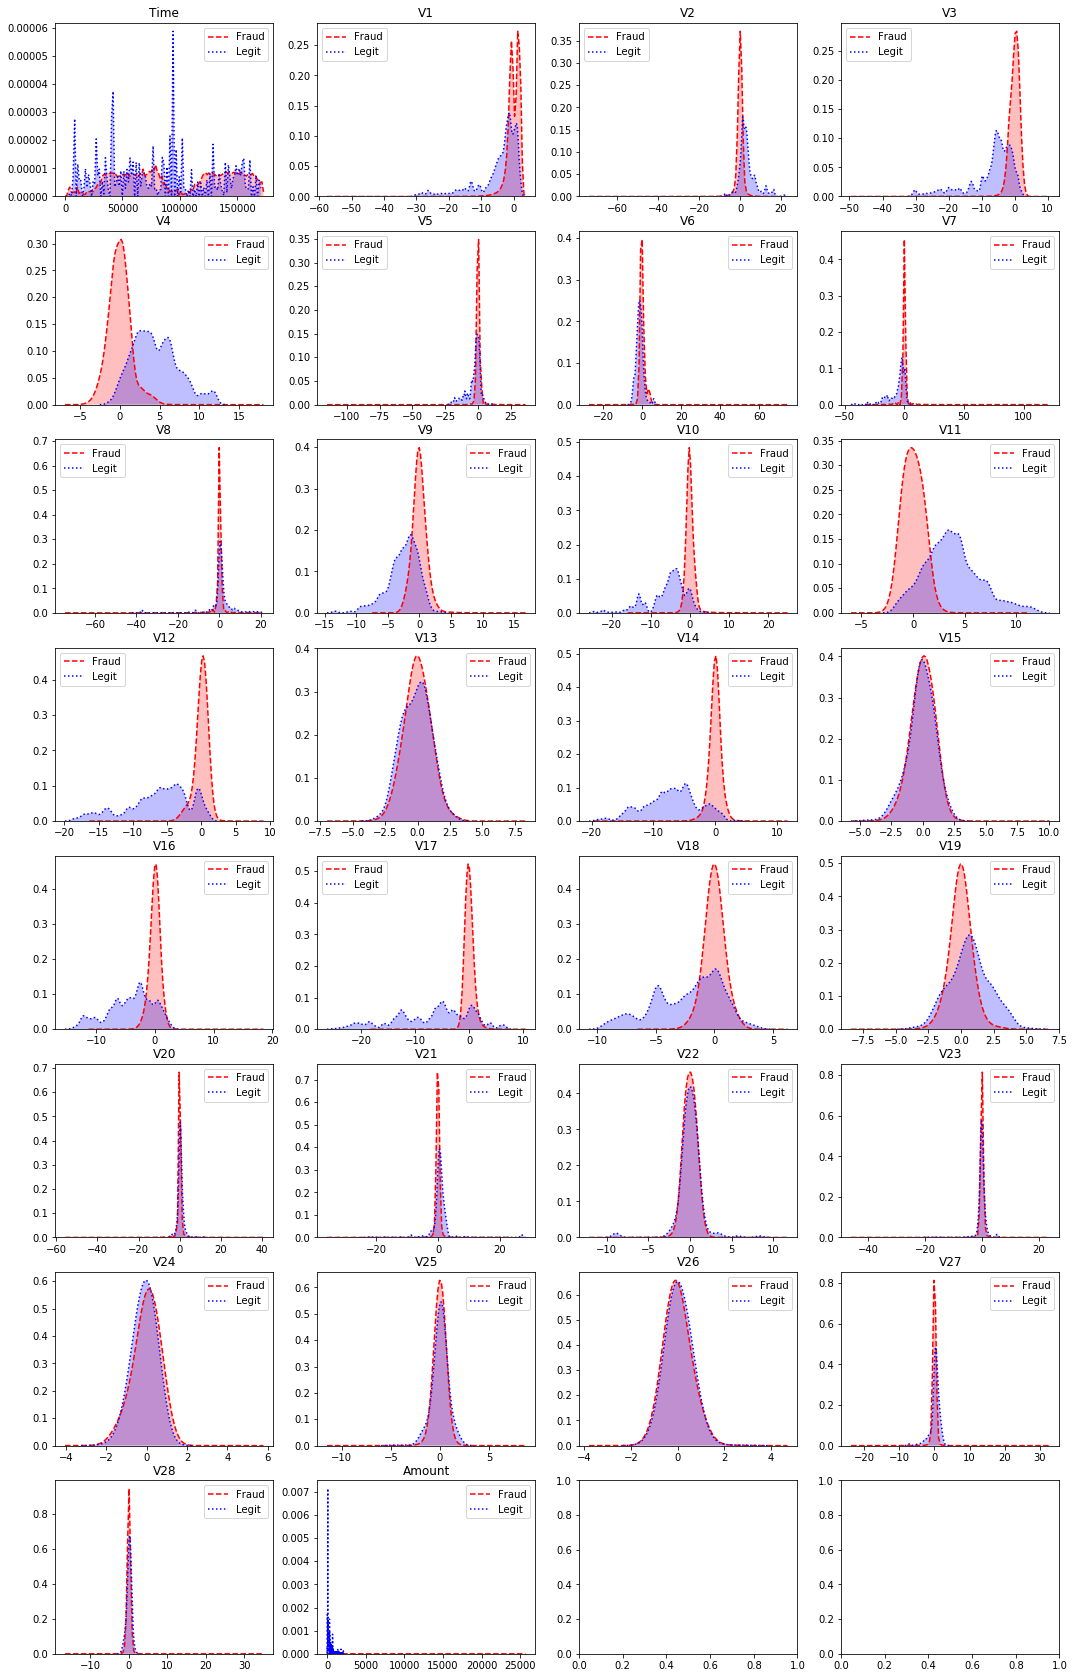

In [11]:
i = 1
plt.subplots(8,4,figsize=(18,30))

for col in colnames:    
    plt.subplot(8,4,i)
    sns.kdeplot(fraud[col], bw = 0.4, label = "Fraud", shade=True, color="r", linestyle="--")
    sns.kdeplot(legit[col], bw = 0.4, label = "Legit", shade=True, color= "b", linestyle=":")
    plt.title(col, fontsize=12)
    i = i + 1
    
plt.show()

## 4. Data Cleaning

First we are going to normalize our 'amount' variable, then drop 12 variables - 'Time','V8','V13','V15','V20','V22','V23','V24','V25','V26','V27', 'V28' - since the distribution of fraud/legit are highly overlaps and it might be difficult to classify Fraud and Legit based on these variables.

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Amount_scaled'] = sc.fit_transform(df['Amount'].values.reshape(-1,1))
df['Amount_scaled'].head(5)

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount_scaled, dtype: float64

In [17]:
df.drop(['Time','V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28'], axis = 1, inplace = True)

## 5. Naive Bayes - Training 

We are going to split our data into 80% training data and 20% testing data 

In [21]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [22]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Amount_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,149.62,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,2.69,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,378.66,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,123.50,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,69.99,-0.073403


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [41]:
print("X_train:", X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

X_train: (227845, 19)
y_train: (227845,)
X_test: (56962, 19)
y_test: (56962,)


Next, we fit Gaussian Naive Bayes model from sklearn.naive_bayes because our predictors are continues variables. From the confusion matrix, we can see that the model misclassified 58 legit cases as fraud cases when using training dataset.

In [42]:
from sklearn.naive_bayes import GaussianNB 
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

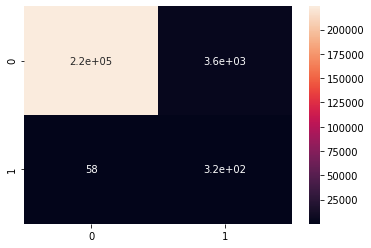

In [44]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

## 6. Naive Bayes - Testing / Result

Let us now move on to testing dataset, and see how the model performs with unseen data. It misclassified 15 legit cases into fraud cases, with weighted average recall score (true positive / true positive plus false negative) of 98%.

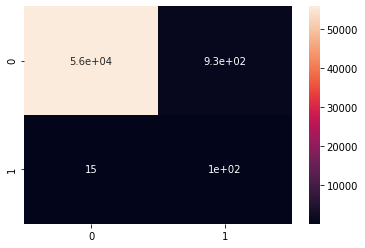

In [45]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [46]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56847
           1       0.10      0.87      0.18       115

    accuracy                           0.98     56962
   macro avg       0.55      0.93      0.58     56962
weighted avg       1.00      0.98      0.99     56962

